# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID:Task2G3M 150
- Names: Alina Kriutchenko, Navya Sushmitha Kovuru, Tithra Chap
- Student IDs: 220129254, 220347427, 220051603
- Emails: akriutchenko@deakin.edu.au, nkovuru@deakin.edu.au, tchap@deakin.edu.au
- Lab Session and Tutor (for on campus students): Practical 1 - BYOD - On campus; Ziwei Hou 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
!pip install ip2geotools

def read_HTWblog(web_filename):
  all_files = ZipFile(web_filename)

  file_names = all_files.namelist()
  file_length = len(all_files.infolist())
  
  print("Zipfiles names_list :\n", file_names)  
  print("\n--------------------------------\n") 
  print('The total number of files loading is: ',file_length )
 
 
  files = [] 
  
  for name in file_names:
    file_data = all_files.read(name).decode('latin1')
    heading = file_data.split("\r\n")[3].split(" ")[1:-1]
    rows = file_data.split("\r\n") 
    temp_li = []

    for line in rows:  
        if len(line.split(" ")) == len(heading): 
            row = line.split(" ") 
            temp_li.append(row) 
        else:
          pass
    
    my_files = pd.DataFrame(temp_li, columns = heading) # create dataframe for each file
    
    files.append(my_files)
  
  df_ht = pd.concat(files) #concat all files into dataframe 
  
  return df_ht



In [ ]:
df_ht = read_HTWblog('/content/drive/MyDrive/HTWebLog_p1.zip')

Zipfiles names_list :
 ['ex061101.log', 'ex061102.log', 'ex061103.log', 'ex061104.log', 'ex061105.log', 'ex061106.log', 'ex061107.log', 'ex061108.log', 'ex061109.log', 'ex061110.log', 'ex061111.log', 'ex061112.log', 'ex061113.log', 'ex061114.log', 'ex061115.log', 'ex061116.log', 'ex061117.log', 'ex061118.log', 'ex061119.log', 'ex061120.log', 'ex061121.log', 'ex061122.log', 'ex061123.log', 'ex061124.log', 'ex061125.log', 'ex061126.log', 'ex061127.log', 'ex061128.log', 'ex061129.log', 'ex061130.log', 'ex061201.log', 'ex061202.log', 'ex061203.log', 'ex061204.log', 'ex061205.log', 'ex061206.log', 'ex061207.log', 'ex061208.log', 'ex061209.log', 'ex061210.log', 'ex061211.log', 'ex061212.log', 'ex061213.log', 'ex061214.log', 'ex061215.log', 'ex061216.log', 'ex061217.log', 'ex061218.log', 'ex061219.log', 'ex061220.log', 'ex061221.log', 'ex061222.log', 'ex061223.log', 'ex061224.log', 'ex061225.log', 'ex061226.log', 'ex061227.log', 'ex061228.log', 'ex061229.log', 'ex061230.log', 'ex061231.log', 

In [ ]:
print("\nData size :",df_ht.shape)
print("\nNumber of records :",len(df_ht))
print("\nNumber of atrributes :",len(df_ht.columns))
print('--------------------------------------')

#attribute name
print('\nAttribute name:\n')

print(df_ht.columns.to_list())


Data size : (8438928, 15)

Number of records : 8438928

Number of atrributes : 15
--------------------------------------

Attribute name:

['date', 'time', 's-sitename', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'sc-status', 'sc-substatus', 'sc-win32-status']


In [ ]:
df_ht.head(5)

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [ ]:
print('Find missing value is "-"')
df_ht.replace('-', np.nan, inplace = True)

print(df_ht.isnull().sum(axis=0))

Find missing value is "-"
date                     0
time                     0
s-sitename               0
s-ip                     0
cs-method                0
cs-uri-stem              0
cs-uri-query       7886532
s-port                   0
cs-username        8438928
c-ip                     0
cs(User-Agent)        3527
cs(Referer)        1308994
sc-status                0
sc-substatus             0
sc-win32-status          0
dtype: int64


In [ ]:
missing_data = (df_ht.isnull().sum(axis=0)*100/len(df_ht))\
                    .reset_index().rename(
                      columns = {"index": "column name", 
                                 0: "% of missing values"})\
                          .sort_values(
                              by="% of missing values", 
                              ascending=False)

print(missing_data[missing_data['% of missing values'] != 0])

       column name  % of missing values
8      cs-username           100.000000
6     cs-uri-query            93.454192
11     cs(Referer)            15.511378
10  cs(User-Agent)             0.041794


In [ ]:
missing_data = list(missing_data[missing_data['% of missing values'] > 15]['column name'])

print('Drop columns with > 15% missing values\n')
df_ht.drop(columns = missing_data , axis =1, inplace = True)

print(df_ht.isnull().sum())
print(df_ht.shape)


Drop columns with > 15% missing values

date                  0
time                  0
s-sitename            0
s-ip                  0
cs-method             0
cs-uri-stem           0
s-port                0
c-ip                  0
cs(User-Agent)     3527
sc-status             0
sc-substatus          0
sc-win32-status       0
dtype: int64
(8438928, 12)


In [ ]:
df_ht.dropna( axis=0 , how = 'any',inplace = True)
print('Drop rows with missing values\n')
print(df_ht.isnull().sum())

Drop rows with missing values

date               0
time               0
s-sitename         0
s-ip               0
cs-method          0
cs-uri-stem        0
s-port             0
c-ip               0
cs(User-Agent)     0
sc-status          0
sc-substatus       0
sc-win32-status    0
dtype: int64


In [ ]:
df_ht.shape

(8435401, 12)

In [ ]:
# only 30% of total data are selected for classification
weblog_df = df_ht.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df
len(weblog_df)

2530620

In [ ]:
weblog_df.head(5)

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
25357,2006-12-03,09:39:19,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_zh-hk.gif,80,218.102.231.100,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
89819,2006-12-04,15:30:01,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,80,218.190.226.30,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
19333,2007-02-23,06:50:42,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_about...,80,203.241.147.26,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304,0,64
29761,2006-11-17,06:35:25,W3SVC1,127.0.0.1,GET,/Tulip/public/2899_2.jpg,80,203.85.132.97,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
52909,2007-02-23,16:56:08,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_zh-hk.gif,80,218.186.9.5,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0


### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [ ]:
# Your code for feature selection
ml_df = weblog_df[['cs-method','c-ip','cs-uri-stem','cs(User-Agent)', 'sc-status']]
ml_df = ml_df.reset_index(drop=True)


#Your code to show the top 5 rows of ml_df
ml_df[:5]

,cs-method,c-ip,cs-uri-stem,cs(User-Agent),sc-status
0,GET,218.102.231.100,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
1,GET,218.190.226.30,/Tulip/common/en-us/images/top_logo.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
2,GET,203.241.147.26,/Tulip/common/en-us/images/sectionbanner_about...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304
3,GET,203.85.132.97,/Tulip/public/2899_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
4,GET,218.186.9.5,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [ ]:
sc_status_labels = ml_df['sc-status'].unique()
sc_status_labels

array(['200', '304', '404', '206', '302', '406', '500', '403', '501',
       '301', '400', '416'], dtype=object)

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

#Your code for Kmeans
le_df.head()

,cs-method,c-ip,cs-uri-stem,cs(User-Agent),sc-status
0,0,26069,2125,863,0
1,0,31171,2119,1386,0
2,0,18482,2093,573,4
3,0,18825,2741,1386,0
4,0,30001,2125,1726,0


In [ ]:
sc_status_labels = le_df['sc-status'].unique()
sc_status_labels

array([ 0,  4,  7,  1,  3,  8, 10,  6, 11,  2,  5,  9])

In [ ]:
my_classes = le_df['sc-status']
my_features = le_df.drop('sc-status', axis=1)
print(my_classes)
print(my_features)

0          0
1          0
2          4
3          0
4          0
          ..
2530615    0
2530616    0
2530617    0
2530618    4
2530619    4
Name: sc-status, Length: 2530620, dtype: int64
         cs-method   c-ip  cs-uri-stem  cs(User-Agent)
0                0  26069         2125             863
1                0  31171         2119            1386
2                0  18482         2093             573
3                0  18825         2741            1386
4                0  30001         2125            1726
...            ...    ...          ...             ...
2530615          0   7632         2437            1535
2530616          0  17824         2990            1562
2530617          0  31478         2104            1278
2530618          0   9446         2324            1535
2530619          0  30679         2304            1562

[2530620 rows x 4 columns]


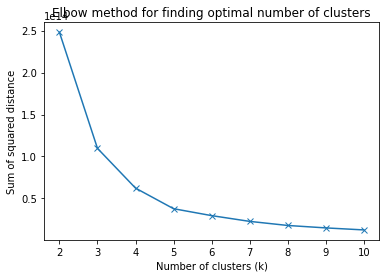

In [ ]:
#Your code for visualizing K means result as elbow plot.
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sum_of_distn = []
krange = range(2,11)
for i in krange:
    kmean = KMeans(n_clusters=i)
    kmean = kmean.fit(my_features)
    sum_of_distn.append(kmean.inertia_)
plt.plot(krange, sum_of_distn, 'x-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method for finding optimal number of clusters')
plt.show()

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [ ]:
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/grap

In [ ]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [ ]:
schema = StructType([StructField("sc_status", IntegerType(), True),
                     StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True)])

sl_df = spark.createDataFrame(le_df, schema)

In [ ]:
#Only 10% of the data is used in this part.
sl_df = sl_df.sample(fraction=0.1, seed=1)

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(sl_df)
df_temp.show(3)

+---------+---------+----+-----------+--------------+--------------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|
+---------+---------+----+-----------+--------------+--------------------+
|        0|    18825|2741|       1386|             0|[18825.0,2741.0,1...|
|        0|    68103|2425|       1460|             0|[68103.0,2425.0,1...|
|        0|    41459|2087|       4239|             0|[41459.0,2087.0,4...|
+---------+---------+----+-----------+--------------+--------------------+
only showing top 3 rows



In [ ]:
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')
df_sl.show(3)

+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[18825.0,2741.0,1...|
|        0|[68103.0,2425.0,1...|
|        0|[41459.0,2087.0,4...|
+---------+--------------------+
only showing top 3 rows



In [ ]:
df_sl.printSchema()

root
 |-- sc_status: integer (nullable = true)
 |-- features: vector (nullable = true)



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [ ]:
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3])

print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 177132
Test Dataset Count: 75897


In [ ]:
trainingData.dtypes

[('sc_status', 'int'), ('features', 'vector')]

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
# Your code contains trainning from train data and predicting based on the test data

dt = DecisionTreeClassifier(featuresCol="features", labelCol="sc_status")
# model = dt.fit(trainingData)
# predictions = model.transform(testData)

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="sc_status")
pipeline = Pipeline(stages=[dt])
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [1, 2, 6, 10])
             .addGrid(dt.maxBins, [20, 40, 80])
             .build())


crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=2)



cvModel = crossval.fit(trainingData)

# RMSE from cross-validation
print(cvModel.avgMetrics)
# RMSE on testing data
print(evaluator.evaluate(cvModel.transform(testData)))

[0.9969267985807335, 0.9969267985807335, 0.9969408885865885, 0.9969116360780805, 0.9970674282670116, 0.997038858617286, 0.9974526076642577, 0.9977853730442029, 0.9975526473317778, 0.9984299488923329, 0.9988296811706285, 0.9989997218993623]
0.9991198684591509


In [ ]:
predictions = cvModel.transform(testData)

In [ ]:
predictions.select('sc_status','features','rawPrediction','prediction','probability').toPandas().head(5)

,sc_status,features,rawPrediction,prediction,probability
0,0,"[4.0, 1866.0, 899.0, 0.0]","[15424.0, 3.0, 0.0, 3.0, 0.0, 0.0]",0.0,"[0.9996111471160077, 0.00019442644199611146, 0..."
1,0,"[4.0, 2119.0, 899.0, 4.0]","[86657.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,0,"[7.0, 1059.0, 196.0, 0.0]","[387.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,0,"[10.0, 2124.0, 1386.0, 0.0]","[86657.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,0,"[16.0, 2146.0, 561.0, 4.0]","[86657.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
predictions.select("prediction", "sc_status", "features").show(5)

+----------+---------+--------------------+
|prediction|sc_status|            features|
+----------+---------+--------------------+
|       0.0|        0|[4.0,1866.0,899.0...|
|       0.0|        0|[4.0,2119.0,899.0...|
|       0.0|        0|[7.0,1059.0,196.0...|
|       0.0|        0|[10.0,2124.0,1386...|
|       0.0|        0|[16.0,2146.0,561....|
+----------+---------+--------------------+
only showing top 5 rows



In [ ]:
class_temp = predictions.select("sc_status").groupBy("sc_status").count().sort('count', ascending=False).toPandas()
class_temp = class_temp["sc_status"].values.tolist()
class_temp

[0, 3, 1, 2, 5, 4]

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("sc_status")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_temp)
cnf_matrix

array([[75734,     2,     9,     0,     2,     0],
       [   14,    59,     0,     0,     0,     0],
       [   34,     0,    35,     0,     0,     0],
       [    0,     0,     0,     6,     0,     0],
       [    0,     0,     0,     0,     0,     1],
       [    0,     0,     0,     0,     0,     1]])

In [ ]:
import itertools

def print_confusion_matrix(cnf_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cnf_matrix)

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[75734     2     9     0     2     0]
 [   14    59     0     0     0     0]
 [   34     0    35     0     0     0]
 [    0     0     0     6     0     0]
 [    0     0     0     0     0     1]
 [    0     0     0     0     0     1]]


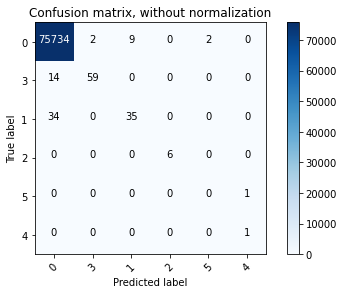

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
print_confusion_matrix(cnf_matrix, classes=class_temp, title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[9.99828376e-01 2.64036860e-05 1.18816587e-04 0.00000000e+00
  2.64036860e-05 0.00000000e+00]
 [1.91780822e-01 8.08219178e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.92753623e-01 0.00000000e+00 5.07246377e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


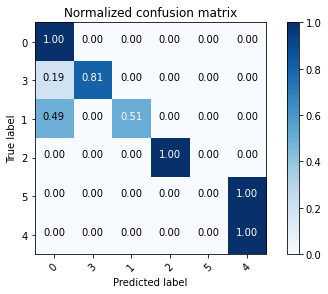

In [ ]:
# Plot normalized confusion matrix
plt.figure()
print_confusion_matrix(cnf_matrix, classes=class_temp, normalize=True, title='Normalized confusion matrix')

plt.show()

In [ ]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="sc_status", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = ", accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy =  0.9991831034164723
Test Error = 0.000816897


In [ ]:
# Your code to display TP, TN, FP, FN
TP = np.diag(cnf_matrix)
print("TP = ",TP)

FP = []
for i in range(5):
    FP.append(sum(cnf_matrix[:,i]) - cnf_matrix[i,i])
print("FP = ",FP)

FN = []
for i in range(5):
    FN.append(sum(cnf_matrix[i,:]) - cnf_matrix[i,i])
print("FN = ",FN)

TN = []
for i in range(5):
    temp = np.delete(cnf_matrix, i, 0)   # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
print("TN = ",TN)

TP =  [75734    59    35     6     0     1]
FP =  [48, 2, 9, 0, 2]
FN =  [13, 14, 34, 0, 1]
TN =  [102, 75822, 75819, 75891, 75894]


In [ ]:
from sklearn.metrics import classification_report

# Your Code to display the classification results as required.
print(classification_report(y_true, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75747
           1       0.80      0.51      0.62        69
           2       1.00      1.00      1.00         6
           3       0.97      0.81      0.88        73
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1

    accuracy                           1.00     75897
   macro avg       0.71      0.72      0.69     75897
weighted avg       1.00      1.00      1.00     75897



In [ ]:
#Free the memory
import gc
del missing_data
del temp
del weblog_df
del ml_df
gc.collect()

11587

### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [ ]:
from pyspark.ml import Pipeline
# K = 2
# Your code for 2-fold cross validation

Logistic Regression


In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol="features", labelCol="sc_status", elasticNetParam=0.8)

evaluator = MulticlassClassificationEvaluator(labelCol="sc_status")
pipeline = Pipeline(stages=[lr])
paramGrid = (ParamGridBuilder().addGrid(lr.regParam, [1.0, 2.0]).addGrid(lr.maxIter, [1, 5]).build())


crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=2)



cvModel = crossval.fit(trainingData)

# RMSE from cross-validation
print(cvModel.avgMetrics)
# RMSE on testing data
print(evaluator.evaluate(cvModel.transform(testData)))

[0.9969267985807335, 0.9969267985807335, 0.9969267985807335, 0.9969267985807335]
0.9970364334151738


In [ ]:
predictions = cvModel.transform(testData)
accuracy = evaluator.evaluate(predictions)
print("Accuracy = ", accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy =  0.9970364334151738
Test Error = 0.00296357


Random Forest Classifier

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol="features", labelCol="sc_status")

evaluator = MulticlassClassificationEvaluator(labelCol="sc_status")
pipeline = Pipeline(stages=[rf])
paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.maxBins, [20, 60])
             .addGrid(rf.numTrees, [5, 20])
             .build())


crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=2)


cvModel = crossval.fit(trainingData)

# RMSE from cross-validation
print(cvModel.avgMetrics)
# RMSE on testing data
print(evaluator.evaluate(cvModel.transform(testData)))

[0.9969267985807335, 0.9969267985807335, 0.9969408175882687, 0.996943536712183, 0.9975928390533755, 0.9969296176720033, 0.9970792309913052, 0.9970441498962664, 0.9981504869062968, 0.9980547215130855, 0.99722785102454, 0.9971249962928543]
0.9971133559677737


In [ ]:
predictions = cvModel.transform(testData)
accuracy = evaluator.evaluate(predictions)
print("Accuracy = ", accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy =  0.9971133559677737
Test Error = 0.00288664


NaiveBayes Classifier

In [ ]:
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(smoothing=1, featuresCol="features", labelCol="sc_status")

evaluator = MulticlassClassificationEvaluator(labelCol="sc_status")
pipeline = Pipeline(stages=[nb])
paramGrid = ParamGridBuilder().build()


crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=2)


cvModel = crossval.fit(trainingData)

# RMSE from cross-validation
print(cvModel.avgMetrics)
# RMSE on testing data
print(evaluator.evaluate(cvModel.transform(testData)))

[0.5836395247415114]
0.5884149472260739


In [ ]:
predictions = cvModel.transform(testData)
accuracy = evaluator.evaluate(predictions)
print("Accuracy = ", accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy =  0.5884149472260739
Test Error = 0.411585


## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [ ]:
!pip install apyori

In [ ]:
# you can also use PySpark package, if preferred
from apyori import apriori

# Your code
transactions = []
for i in range(0, len(le_df)):
    transactions.append([str(le_df.values[i,j]) for j in range(0, 5)])
print(transactions)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
threshold_support=0.0015
confidence_values = np.arange(0.5, 1, 0.05)
for i in confidence_values:
  print(round(i,4))

0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


In [ ]:
i=0
for c in confidence_values:
  print("Support= ",threshold_support,"\tConfidence= ", round(c,4))
  rules = apriori(transactions, min_support = threshold_support, min_confidence = round(c,4), min_lift = 3, min_length = 2)
  # Visualising the results
  results = list(rules)
  myResults = [list(x) for x in results]
  print("Round: ",i)
  for j in range(len(results)):
      print(j)
      print(results[j])
      print(results[j].items)
  print("##############################################################################")
  i=i+1

Support=  0.0015 	Confidence=  0.5
Round:  0
0
RelationRecord(items=frozenset({'1646', '7450'}), support=0.0019477440311070015, ordered_statistics=[OrderedStatistic(items_base=frozenset({'7450'}), items_add=frozenset({'1646'}), confidence=0.5421845781542185, lift=32.84412057854287)])
frozenset({'1646', '7450'})
1
RelationRecord(items=frozenset({'204', '4'}), support=0.00222909800760288, ordered_statistics=[OrderedStatistic(items_base=frozenset({'204'}), items_add=frozenset({'4'}), confidence=0.7865309537088678, lift=3.10517984027185)])
frozenset({'204', '4'})
2
RelationRecord(items=frozenset({'3018', '7'}), support=0.001864365254364543, ordered_statistics=[OrderedStatistic(items_base=frozenset({'3018'}), items_add=frozenset({'7'}), confidence=0.9184348841736423, lift=54.29001159953055)])
frozenset({'3018', '7'})
3
RelationRecord(items=frozenset({'3118', '7'}), support=0.008831827773431018, ordered_statistics=[OrderedStatistic(items_base=frozenset({'3118'}), items_add=frozenset({'7'}), 

In [ ]:
threshold_support=0.001
i=0
for c in confidence_values:
  print("Support= ",threshold_support,"\tConfidence= ", round(c,4))
  rules = apriori(transactions, min_support = threshold_support, min_confidence = round(c,4), min_lift = 3, min_length = 2)
  # Visualising the results
  results = list(rules)
  myResults = [list(x) for x in results]
  print("Round: ",i)
  for j in range(len(results)):
      print(j)
      print(results[j])
      print(results[j].items)
  print("##############################################################################")
  i=i+1

Support=  0.001 	Confidence=  0.5
Round:  0
0
RelationRecord(items=frozenset({'2400', '1'}), support=0.001029392006701915, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2400'}), items_add=frozenset({'1'}), confidence=0.7434360730593607, lift=78.93904230291945)])
frozenset({'2400', '1'})
1
RelationRecord(items=frozenset({'1386', '33447'}), support=0.0011250207459041657, ordered_statistics=[OrderedStatistic(items_base=frozenset({'33447'}), items_add=frozenset({'1386'}), confidence=0.9858033240997228, lift=5.170617354335957)])
frozenset({'1386', '33447'})
2
RelationRecord(items=frozenset({'1646', '7450'}), support=0.0019477440311070015, ordered_statistics=[OrderedStatistic(items_base=frozenset({'7450'}), items_add=frozenset({'1646'}), confidence=0.5421845781542185, lift=32.84412057854287)])
frozenset({'1646', '7450'})
3
RelationRecord(items=frozenset({'204', '4'}), support=0.00222909800760288, ordered_statistics=[OrderedStatistic(items_base=frozenset({'204'}), items_add=froz

#####The Best Results

| S.No. |min_support | min_confidence | min_lift | min_length | Number of Rules |
|---|---|---|---|---|---|
| 1 | 0.0015 | 0.9 | 3 | 2 | **8** |
| 2 | 0.0015 | 0.85 | 3 | 2 | **8** |
| 3 | 0.0015 | 0.8 | 3 | 2 | **10** |
| 4 | 0.0015 | 0.75 | 3 | 2 | **12** |
| 5 | 0.0015 | 0.7 | 3 | 2 | **12** |
| 6 | 0.001 | 0.95 | 3 | 2 | **8** |







# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

In [ ]:
#important packages for web crawling
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# Your code to crawl and generate the csv, and save it to variable create_df

#Web crawling from the citation graph
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Establish chrome driver and go to site URL
# set options to be headless
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# open it, go to a website, and get results
url = 'https://scholar.google.com/citations?user=dqwjm-0AAAAJ'
driver = webdriver.Chrome('chromedriver',options=options)
driver.get(url)

#Web crawling process
button = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.ID, 'gsc_hist_opn')))
#click the <view all> button
driver.execute_script('arguments[0].click();', button)
#get the body of the citation graph
graph = driver.find_element_by_class_name('gsc_md_hist_b')
#get [year] and [citation]
span = graph.find_elements_by_xpath('span')
a = graph.find_elements_by_xpath('a//span')
year = []
citation = []
for i,j in zip(span,a):
  year.append(i.get_attribute('innerHTML'))
  citation.append(j.get_attribute('innerHTML'))

#create dataframe
data = {'Year':year, 'Citation':citation}
create_df = pd.DataFrame(data)
create_df.Year = pd.to_numeric(create_df.Year)
create_df.Citation = pd.to_numeric(create_df.Citation)
create_df = create_df.dropna()
create_df = create_df.groupby('Year',as_index=True).sum()
create_df.to_csv('Citation2003-2021.csv')

## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test

create_df.index = pd.to_datetime(create_df.index,format='%Y')
#create_df.set_index('Year',inplace=True)
train_set = create_df[0:15]
test_set = create_df[15:18]

### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
!pip install "statsmodels==0.11.1"

In [ ]:
# your code to predict the citation and save it to variable preds. 
# You may need to output the confidence interval(95%) here as well
from statsmodels.tsa.arima.model import ARIMA

#fit the model

# avoid index warning
train_set.index = pd.DatetimeIndex(train_set.index.values,freq=train_set.index.inferred_freq)
model = ARIMA(train_set, order=(1,1,1)).fit()
print(model.summary())

# Forecast with 95% confidence level
preds = model.forecast(3,alpha = 0.05) #get 3 steps forecast for 2018-2020
result = model.get_forecast(3)
conf = result.conf_int(0.05)

                               SARIMAX Results                                
Dep. Variable:               Citation   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.377
Date:                Wed, 19 May 2021   AIC                            130.755
Time:                        07:04:59   BIC                            132.672
Sample:                    01-01-2003   HQIC                           130.577
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9490      0.240      3.957      0.000       0.479       1.419
ma.L1         -0.4663      0.660     -0.707      0.480      -1.760       0.827
sigma2       393.2195    170.736      2.303      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import math

year = [2018,2019,2020]
print('The error for each year prection:\n')
print('YEAR\tPREDICTION\tTEST_THRUTH\tERROR')
for i, j, y in zip(preds,test_set.values,year):
  print('{}{:7}{:16}{:16}'.format(y,int(i),int(j),int(int(i)-j)))

# Your code to show the performance RMSE
MSE = mean_squared_error(test_set,preds)
RMSE = math.sqrt(MSE)
print('\nRMSE of the model is: {}'.format(RMSE))


The error for each year prection:

YEAR	PREDICTION	TEST_THRUTH	ERROR
2018    429             450             -21
2019    470             579            -109
2020    508             838            -330

RMSE of the model is: 200.48296899058838


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

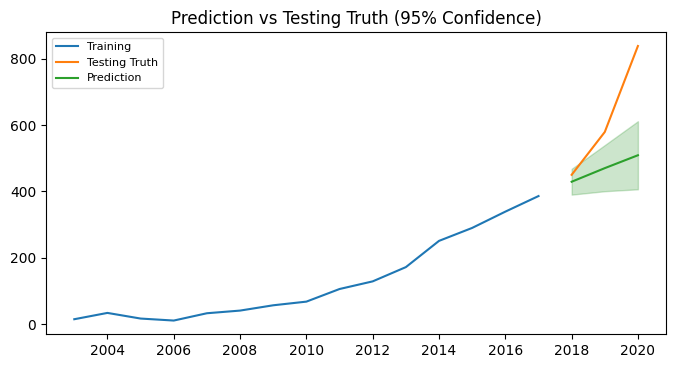

In [ ]:
# You code: Visualize as required, the prediction with its confidence interval

# set up the confidence boundary
lower = conf['lower Citation']
upper = conf['upper Citation']

# Plot the forecast
plt.figure(figsize=(8,4), dpi=100)
plt.plot(train_set, label='Training')
plt.plot(test_set, label='Testing Truth')
plt.plot(preds, label='Prediction')
plt.fill_between(test_set.index, lower, upper, color='green', alpha=.2)
plt.title('Prediction vs Testing Truth (95% Confidence)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to run grid search

p_list = list(range(1,3))
q_list = list(range(1,3))
d_list = list(range(1,3))
RMSE = []
PARAMETER = []
best_order = (1,1,1)

# ARIMA evaluation function (p,q,d)
def arima_evaluate(x, y, arima_order):
  model = ARIMA(x, order=arima_order).fit()
  result = model.get_forecast(3,alpha=0.05)
  preds = result.prediction_results.results.forecasts[0]
  rmse = math.sqrt(mean_squared_error(y,preds))
  return rmse

#Grid search
for p in p_list:
  for q in q_list:
    for d in d_list:
      order = (p,q,d)
      try:
        rmse = arima_evaluate(train_set, test_set, order)
        if(len(RMSE)>0):
            if(rmse < min(RMSE)): #select the best order
                best_order = order
        RMSE.append(round(rmse,2))
        PARAMETER.append(order)
      except:
        RMSE.append('error')
        PARAMETER.append(order)
        continue
print('Best parameter order is {}'.format(best_order))
print('Grid search is completed.')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist

Best parameter order is (1, 2, 2)
Grid search is completed.


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
# your code to generate the seach-results.csv and print the top 6 rows

search_result = pd.DataFrame({'RMSE':RMSE,'PARAMETER':PARAMETER})
search_result.to_csv('Search-results.csv',index=False)
search_result.head(6)



,RMSE,PARAMETER
0,200.48,"(1, 1, 1)"
1,204.59,"(1, 1, 2)"
2,187.02,"(1, 2, 1)"
3,174.80,"(1, 2, 2)"
4,200.09,"(2, 1, 1)"
5,204.69,"(2, 1, 2)"


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to perform the Arima train on data 2003 to 2020

#Get the train dataset up to 2020
train_set = create_df[:-1].copy()


#fit the model with the best parameters
train_set.index = pd.DatetimeIndex(train_set.index.values,freq=train_set.index.inferred_freq) # avoid index warning
model = ARIMA(train_set, order = best_order).fit()
print(model.summary())

# To predict 2 steps ahead for 2021 and 2022
preds = model.forecast(2,alpha = 0.05,)
result = model.get_forecast(2)
conf = result.conf_int(0.05) # Get 95% confident level



                               SARIMAX Results                                
Dep. Variable:               Citation   No. Observations:                   18
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 -81.222
Date:                Wed, 19 May 2021   AIC                            170.444
Time:                        07:05:26   BIC                            173.535
Sample:                    01-01-2003   HQIC                           170.603
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6913      1.588      0.435      0.663      -2.421       3.803
ma.L1         -0.1639      1.574     -0.104      0.917      -3.249       2.921
ma.L2          0.1112      0.987      0.113      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

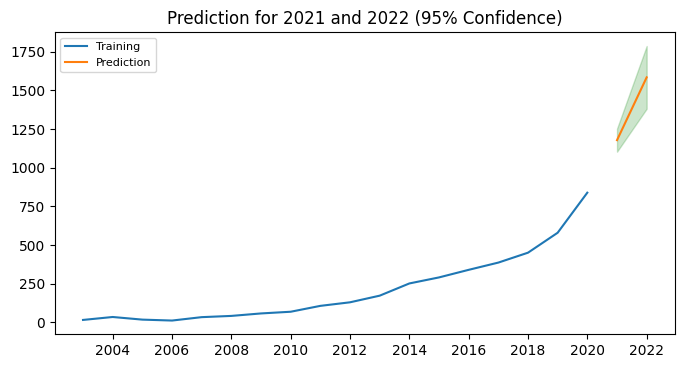

In [ ]:
# Plot the points and the prediction with its confidence interval

#set up the confidence boundary
lower = conf['lower Citation']
upper = conf['upper Citation']

# Plot the forecast
plt.figure(figsize=(8,4), dpi=100)
plt.plot(train_set, label='Training')
plt.plot(preds, label='Prediction')
plt.fill_between(preds.index, lower, upper, color='green', alpha=0.2)
plt.title('Prediction for 2021 and 2022 (95% Confidence)')
plt.legend(loc='upper left', fontsize=8)
plt.show()


# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
